<a href="https://colab.research.google.com/github/AliceKa/hello-world/blob/master/h5_with_3000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Connecting the environment of this notebook to Google Drive

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Downloading the file from Google Drive 

In [0]:
download = drive.CreateFile({'id': '1UbVE0_WzBkPsqFzBboTiFgxVwl2nufJc'})
download.GetContentFile('DOWNLOAD1.zip')

Unzipping the archive

In [0]:
#!unzip "DOWNLOAD1.zip"

In [26]:
print('Length of the train data --', len(open('media/train.txt').readlines()))
print('Length of the val data --', len(open('media/val.txt').readlines()))
print('Length of the test data --', len(open('media/test.txt').readlines()))

Length of the train data -- 117263
Length of the val data -- 15758
Length of the test data -- 15758


Creating 2 lists of the names (future paths) of the images and its labels

In [0]:
list_of_image_names = [string.split()[0] for string in open('media/train.txt','r').readlines()]
list_of_image_labels = [string.split()[1] for string in open('media/train.txt','r').readlines()]

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
import numpy as np
import h5py
import math
import time
from random import shuffle
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import fully_connected, l2_regularizer
from tensorflow.contrib.framework import arg_scope
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [0]:
dataset_img_name = 'input_data'
dataset_lab_name = 'input_labels'

In [0]:
def create_h5_img(list_of_imag_small, datafile_name):
  
  with h5py.File(datafile_name, 'w') as f:

          f.create_dataset(dataset_img_name, (3000, 256 * 256 * 3), np.float32)

          for i in range(3000):
              filepath = list_of_imag_small[i]
              img = cv2.imread('media/'+filepath)
              img = img / 255
              img = img.ravel()

              f[dataset_img_name][i, ...] = img[None]

In [0]:
def create_h5_lab(list_of_lab_small, datafile_name):

  with h5py.File(datafile_name, 'a') as f:       
            labels = np.array(list_of_lab_small, dtype=np.int8)
            f.create_dataset(dataset_lab_name, (3000,), np.int8)
            f[dataset_lab_name][...] = labels[:3000]

In [17]:
batch_h5_size = 3000
total_batches = len(list_of_image_names)/3000
number_h5s = 3

for i in range(number_h5s):
  
  print('Creating file', (i))
  
  datafile_name = 'h5_train_' + str(i)
  
  #Slicing the dataset
  list_of_imag_small = list_of_image_names[i*batch_h5_size:i*batch_h5_size+batch_h5_size]
  list_of_lab_small = list_of_image_labels[i*batch_h5_size:i*batch_h5_size+batch_h5_size]
  
  #Creating h5 for images and labels
  create_h5_img(list_of_imag_small, datafile_name)
  create_h5_lab(list_of_lab_small, datafile_name)
  
  #Uploading h5 to Google Drive
  created_file = drive.CreateFile({'title' : datafile_name})
  created_file.SetContentFile(datafile_name)
  created_file.Upload()
  #Id for future extraction if needed
  drive.CreateFile({'id': created_file.get('id')})
  print(datafile_name,'with id', created_file.get('id'))

Creating file 0
h5_train_0 with id 1c3-Yy8Fl7YNxZzU5FTSCZEORxNl94Mf0
Creating file 1
h5_train_1 with id 1O6JJXMbcolcy6l9MMiLwmcMCiRv-Z5hf
Creating file 2
h5_train_2 with id 1JJJVsC5Xi7k7txz3ppUaaylDrl0N5sJ7


In [18]:
datafile_name = 'h5_train_' + str(0)
with h5py.File(datafile_name, "r") as f:
    
    print(list(f.keys()))
    
    x = f[dataset_img_name][:]
    y = f[dataset_lab_name][:]

    print('x shape =', x.shape, '| y shape =', y.shape)
    print('Number of classes presented =', len(set(y)))

['input_data', 'input_labels']
x shape = (3000, 196608) | y shape = (3000,)
Number of classes presented = 39


(196608,)
y = 24


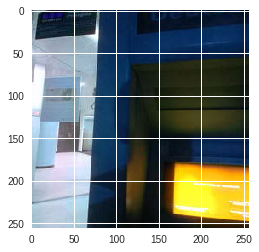

In [19]:
index = 0
image = x[index]
print(image.shape)
image = (x[index]).reshape(256, 256, 3)
plt.imshow(image)
print('y =', y[index])

In [23]:
%%bash

ls -lh

total 8.8G
-rw-r--r--  1 root root 2.5K Mar  5 11:45 adc.json
-rw-r--r--  1 root root 2.2G Mar  5 11:46 DOWNLOAD1.zip
-rw-r--r--  1 root root 2.2G Mar  5 12:17 h5_train_0
-rw-r--r--  1 root root 2.2G Mar  5 12:19 h5_train_1
-rw-r--r--  1 root root 2.2G Mar  5 12:20 h5_train_2
drwxr-xr-x 18 root root 4.0K Mar  5 11:54 media
drwxr-xr-x  1 root root 4.0K Feb 26 17:33 sample_data
